In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from sklearn.metrics import r2_score

from helper_fn import *

sys.path.append("..")
from modules.utils import paper_style

paper_style()

# loading GT stuff
current_dir = ""
relative_path = "../data"
path = os.path.join(current_dir, relative_path)
# data_path = os.path.join(path, "results/")
data_path = os.path.join(path, "test/")

data_drug_path = os.path.join(path, "test_drug/")
gt_path = os.path.join(path, "GT/")
gt_drug_path = os.path.join(path, "GT_drug/labels/")

# important flag! set to True if you want to load data for drug treated cells
drug = False

if drug:
    data_path_ = data_drug_path
    gt_path_ = gt_drug_path
else:
    data_path_ = data_path
    gt_path_ = gt_path

gt_tracks = []
taus = []
for i, fn in enumerate(os.listdir(gt_path_)):
    track = np.load(os.path.join(gt_path_, fn)).squeeze().T
    tau = np.linspace(0, 1, track.shape[0])
    gt_tracks.append(track)
    taus.append(tau)

track_lengths = [track.shape[0] for track in gt_tracks]

modality = "bf"
head = "xtransformer"
tracks = get_data(path=data_path_, modality=modality, head=head)
n_tracks = len(tracks)
fucci_labels = ["green", "red"]

# vanilla_track = vanilla_fn(np.linspace(0, 1, 1000))
# vanilla_tau = np.linspace(0, 1, 1000)

# some plots

In [19]:
# tracks[0].shape, gt_tracks[0].shape

# tr0 = tracks[0]
# gt0 = gt_tracks[0]

# plt.plot(tr0)
# plt.plot(gt0)
# plt.show()

# np.abs(tr0 - gt0).mean(axis=(0))
# l1_err = mean_track_error(gt_tracks, tracks, metric="L1", av_channels=False)

# fi = 0
# plt.title(f"{modality} {head} fucci L1 errors")
# plt.hist(l1_err[:, fi], label=fucci_labels[fi], alpha=0.5, color="green")

# fi = 1
# plt.hist(l1_err[:, fi], label=fucci_labels[fi], alpha=0.5, color="red")

# plt.legend()
# plt.show()
# plt.title(f"{modality} {head} fucci L1 errors VS track length")

# plt.scatter(
#     track_lengths, l1_err[:, 0], label=fucci_labels[0], alpha=0.5, color="green"
# )
# plt.scatter(track_lengths, l1_err[:, 1], label=fucci_labels[1], alpha=0.5, color="red")
# plt.scatter(l1_err[:, 0], l1_err[:, 1], alpha=0.5)
# plt.xlabel(f"{fucci_labels[0]} error")
# plt.ylabel(f"{fucci_labels[1]} error")

# plt.title(f"{modality} {head} fucci L1 errors")

# plt.axline([0, 0], slope=1, color="black", linestyle="--")
# errors_g = []
# errors_r = []
# for i in range(n_tracks):
#     error = np.abs(tracks[i] - gt_tracks[i])
#     errors_g.append(error[:, 0])
#     errors_r.append(error[:, 1])
# errors_g_unrolled = np.concatenate(errors_g)
# errors_r_unrolled = np.concatenate(errors_r)
# taus_unrolled = np.concatenate(taus)
# import seaborn as sns

# df = pd.DataFrame(
#     {
#         "tau": taus_unrolled,
#         "error_g": errors_g_unrolled,
#         "error_r": errors_r_unrolled,
#         "fucci": "green",
#     }
# )

# # # density plot taus VS errors_g
# # sns.kdeplot(data=df, x="tau", y="error_g", hue="fucci", fill=True)
# # plt.show()
# # # density plot taus VS errors_g
# # sns.kdeplot(data=df, x="tau", y="error_r", hue="fucci", fill=True)
# def avarage_errors(errors, taus, n_bins=30):
#     bins = np.linspace(0, 1, n_bins + 1)
#     bin_indices = np.digitize(taus, bins) - 1  # Bin indices (0-indexed)

#     # Compute bin averages
#     averaged_profile = np.array([
#         errors[bin_indices == i].mean() if np.any(bin_indices == i) else 0
#         for i in range(n_bins)
#     ])
#     return averaged_profile, bins

# errors_g_averaged, bins = avarage_errors(errors_g_unrolled, taus_unrolled)
# errors_r_averaged, bins = avarage_errors(errors_r_unrolled, taus_unrolled)

# plt.title(f"{modality} {head} fucci L1 errors averaged")

# plt.plot(bins[:-1], errors_g_averaged, color="green", label="green")
# plt.plot(bins[:-1], errors_r_averaged, color="red", label="red")

# plt.ylim(0, 0.5)

# plt.xlabel("phase")
# plt.ylabel("average error")

# # save as pdf in ../plots/av_error
# plt.savefig(f"../plots/av_error/{modality}_{head}_fucci_errors.pdf")
# # density plot taus VS errors_g

# plt.plot(vanilla_tau, vanilla_track[:, 0], color="black")
# plt.hexbin(taus_unrolled, errors_g_unrolled, gridsize=50, cmap="Greens", bins="log")
# plt.xlabel("phi")
# plt.ylabel("prediction error")
# plt.title(f"{head} {modality} fucci green error")
# plt.show()
# # same for red

# plt.plot(vanilla_tau, vanilla_track[:, 1], color="black")
# plt.hexbin(taus_unrolled, errors_r_unrolled, gridsize=50, cmap="Reds", bins="log")
# plt.xlabel("phi")
# plt.ylabel("prediction error")
# plt.title(f"{head} {modality} fucci red error")
# plt.show()

# non smoothed

In [20]:
drug

False

In [21]:
if drug == False:
    tr_green = 0.035
    tr_phase_green = 0.15
elif drug == True:
    tr_green = 0.14
    tr_phase_green = 0.4


x_crossings_gt, idx_crossing_gt = find_crossing_points(
    taus, gt_tracks, tr_green=tr_green, drug=drug
)
x_crossings, idx_crossing = find_crossing_points(
    taus, tracks, tr_green=tr_green, tr_phase_green=tr_phase_green, drug=drug
)

window_length = 20

x_crossings_smooth, idx_crossing_smooth = find_crossing_points(
    taus,
    tracks,
    tr_green=tr_green,
    tr_phase_green=tr_phase_green,
    drug=drug,
    smooth_window=window_length,
)

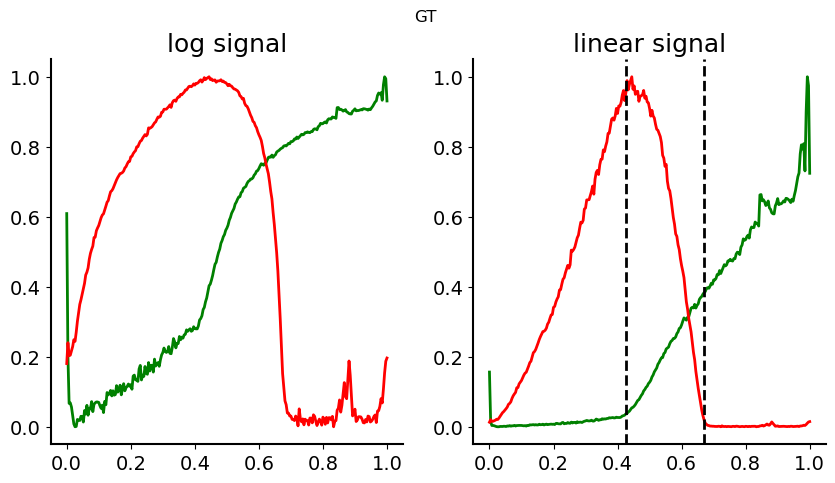

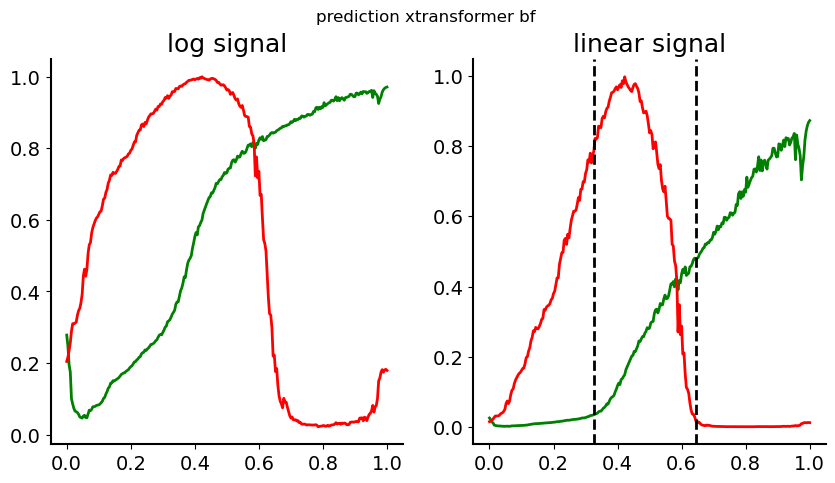

In [22]:
plt.figure(figsize=(10, 5))
plt.suptitle("GT")

idx = np.random.randint(0, n_tracks)

plt.subplot(1, 2, 1)
plt.title(f"log signal")
plt.plot(taus[idx], gt_tracks[idx][:, 0], color="green")
plt.plot(taus[idx], gt_tracks[idx][:, 1], color="red")

fuc = inverse_log_min_max(gt_tracks[idx], eps=0.01, log_base=np.e)

plt.subplot(1, 2, 2)
plt.title(f"linear signal")
plt.plot(taus[idx], fuc[:, 0], color="green")
plt.plot(taus[idx], fuc[:, 1], color="red")


plt.axvline(x_crossings_gt[idx, 0], color="black", linestyle="--")
plt.axvline(x_crossings_gt[idx, 1], color="black", linestyle="--")
plt.show()


plt.figure(figsize=(10, 5))
plt.suptitle(f"prediction {head} {modality}")

plt.subplot(1, 2, 1)
plt.title(f"log signal")
plt.plot(taus[idx], tracks[idx][:, 0], color="green")
plt.plot(taus[idx], tracks[idx][:, 1], color="red")

fuc = inverse_log_min_max(tracks[idx], eps=0.01, log_base=np.e)

plt.subplot(1, 2, 2)
plt.title(f"linear signal")
plt.plot(taus[idx], fuc[:, 0], color="green")
plt.plot(taus[idx], fuc[:, 1], color="red")


# plt.axhline(th_green, color="black", linestyle="--")
plt.axvline(x_crossings[idx, 0], color="black", linestyle="--")
plt.axvline(x_crossings[idx, 1], color="black", linestyle="--")

In [23]:
tau = taus[idx]
track = tracks[idx]

fuc = inverse_log_min_max(track, eps=0.01, log_base=np.e)
find_crossing_green(tau, fuc[:, 0], th=tr_green, th_phase=tr_phase_green)

0.32592592592592595

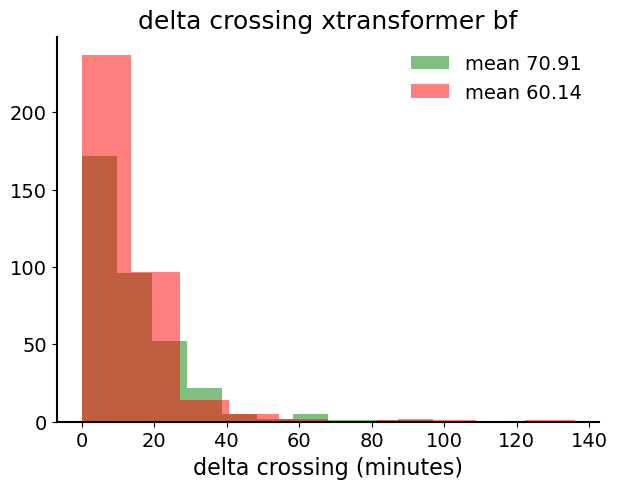

In [24]:
delta_crossings = np.abs(idx_crossing_gt - idx_crossing)
time_delta_crossings = delta_crossings * 5
tdcm = time_delta_crossings.mean(axis=0)

plt.title(f"delta crossing {head} {modality}")
# first column in green, second in red
plt.hist(delta_crossings[:, 0], label=f"mean {tdcm[0]:.2f}", alpha=0.5, color="green")
plt.hist(delta_crossings[:, 1], label=f"mean {tdcm[1]:.2f}", alpha=0.5, color="red")
plt.xlabel("delta crossing (minutes)")
plt.legend()

# smoothed

(277, 2)


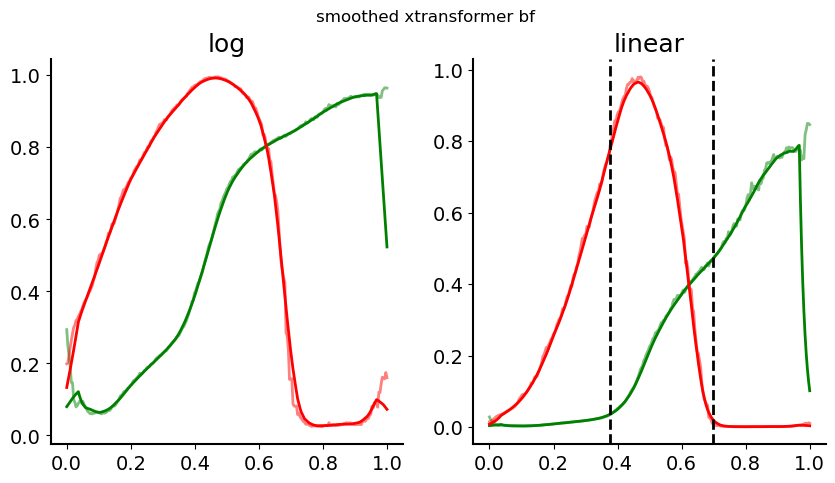

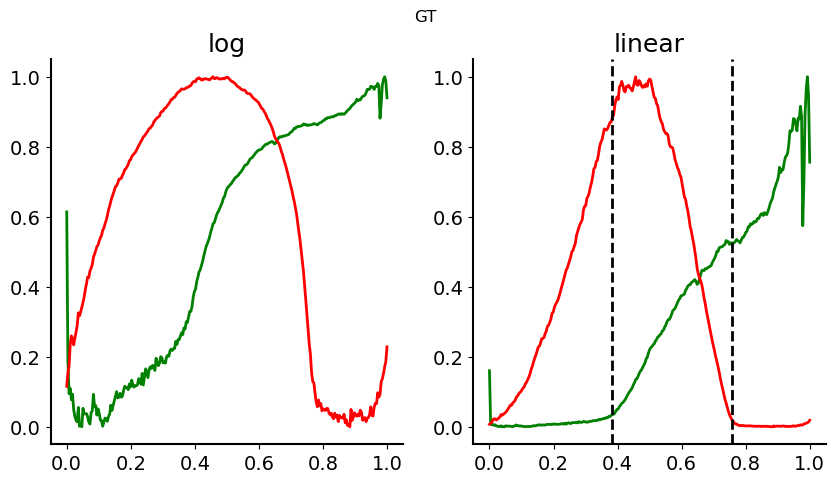

In [25]:
idx = np.random.randint(0, n_tracks)

track = tracks[idx][:, :]
len_tr = track.shape[0]


# smoothed_track = savgol_filter(track, window_length=window_length, polyorder=2, axis=0)
# simple convolution
smoothed_track_g = np.convolve(
    track[:, 0], np.ones((window_length)) / window_length, mode="same"
)
smoothed_track_r = np.convolve(
    track[:, 1], np.ones((window_length)) / window_length, mode="same"
)
smoothed_track = np.stack([smoothed_track_g, smoothed_track_r], axis=1)
print(smoothed_track.shape)


plt.figure(figsize=(10, 5))
plt.suptitle(f"smoothed {head} {modality}")
plt.subplot(1, 2, 1)

plt.title(f"log")
plt.plot(taus[idx], track[:, 0], color="green", alpha=0.5)
plt.plot(taus[idx], track[:, 1], color="red", alpha=0.5)

plt.plot(taus[idx], smoothed_track[:, 0], color="green")
plt.plot(taus[idx], smoothed_track[:, 1], color="red")


fuc = inverse_log_min_max(track, eps=0.01, log_base=np.e)
fuc_smoothed = inverse_log_min_max(smoothed_track, eps=0.01, log_base=np.e)

plt.subplot(1, 2, 2)
plt.title(f"linear")
plt.plot(taus[idx], fuc[:, 0], color="green", alpha=0.5)
plt.plot(taus[idx], fuc[:, 1], color="red", alpha=0.5)

plt.plot(taus[idx], fuc_smoothed[:, 0], color="green")
plt.plot(taus[idx], fuc_smoothed[:, 1], color="red")

plt.axvline(x_crossings_smooth[idx, 0], color="black", linestyle="--")
plt.axvline(x_crossings_smooth[idx, 1], color="black", linestyle="--")


####################
# GT
####################

plt.figure(figsize=(10, 5))
plt.suptitle(f"GT")

plt.subplot(1, 2, 1)
plt.title(f"log")
plt.plot(taus[idx], gt_tracks[idx][:, 0], color="green")
plt.plot(taus[idx], gt_tracks[idx][:, 1], color="red")

fuc = inverse_log_min_max(gt_tracks[idx], eps=0.01, log_base=np.e)

plt.subplot(1, 2, 2)
plt.title(f"linear")
plt.plot(taus[idx], fuc[:, 0], color="green")
plt.plot(taus[idx], fuc[:, 1], color="red")


plt.axvline(x_crossings_gt[idx, 0], color="black", linestyle="--")
plt.axvline(x_crossings_gt[idx, 1], color="black", linestyle="--")
plt.show()

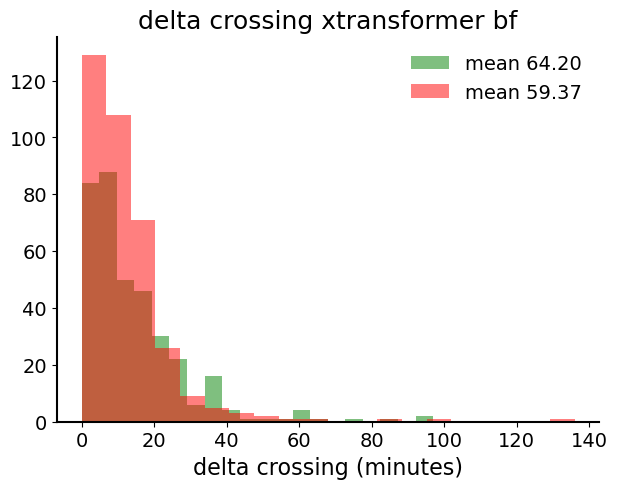

In [29]:
delta_crossings_smooth = np.abs(idx_crossing_gt - idx_crossing_smooth)
time_delta_crossings_smooth = delta_crossings_smooth * 5
tdcm_smooth = np.nanmean(time_delta_crossings_smooth, axis=0)

plt.title(f"delta crossing {head} {modality}")
# first column in green, second in red
plt.hist(delta_crossings[:, 0], label=f"mean {tdcm_smooth[0]:.2f}", alpha=0.5, color="green",bins=20)
plt.hist(delta_crossings[:, 1], label=f"mean {tdcm_smooth[1]:.2f}", alpha=0.5, color="red",bins=20)
plt.xlabel("delta crossing (minutes)")
plt.legend()

In [30]:
window_length

20

In [31]:
print(f"tdcm smooth {head} {modality} green: {tdcm_smooth[0]:.2f}")
print(f"tdcm smooth {head} {modality} red: {tdcm_smooth[1]:.2f}")

# non smoothed
print(f"tdcm {head} {modality} green: {tdcm[0]:.2f}")
print(f"tdcm {head} {modality} red: {tdcm[1]:.2f}")

tdcm smooth xtransformer bf green: 64.20
tdcm smooth xtransformer bf red: 59.37
tdcm xtransformer bf green: 70.91
tdcm xtransformer bf red: 60.14
